In [1]:
import pandas as pd
import os
import re


In [4]:
DATA_PATH = './texts/'

## Load jokes

In [5]:
jokes_dict_raw = {}
for joke_filename in os.listdir(DATA_PATH + '/jokes'):
    if not '.html' in joke_filename:
        continue
    joke_number = joke_filename.replace('init', '').replace('.html', '')
    joke_number = int(joke_number)
    
    with open(DATA_PATH + f'/jokes/{joke_filename}', encoding='latin1') as f:
        jokes_dict_raw[joke_number] = f.read()

In [6]:
jokes = []
for k in sorted(jokes_dict_raw.keys()):
    
    joke = re.findall('<!--begin of joke -->([\s\S]+)<!--end of joke -->', jokes_dict_raw[k])[0]
    jokes.append(joke)

In [7]:
text_df = pd.DataFrame(jokes, columns=['text']).reset_index()
text_df.columns = ['text_id', 'text']
text_df['text_id'] = text_df['text_id'] + 1
text_df.to_csv('data.csv', index=False)

## Load annotations

In [9]:
jester_data_1 = pd.read_excel(DATA_PATH + 'jester-data-1.xls', header=None)
jester_data_2 = pd.read_excel(DATA_PATH + 'jester-data-2.xls', header=None)
jester_data_3 = pd.read_excel(DATA_PATH + 'jester-data-3.xls', header=None)

In [10]:
jester_data = pd.concat([jester_data_1, jester_data_2, jester_data_3])

In [11]:
jester_annotations = jester_data.iloc[:, 1:].reset_index(drop=True).reset_index().melt(id_vars=['index'])
jester_annotations = jester_annotations.loc[jester_annotations.value != 99.0]
jester_annotations.columns = ['annotator_id', 'text_id', 'humor']
jester_annotations.to_csv('jester_annotations.csv', index=False)

text_id
1      AxesSubplot(0.125,0.125;0.775x0.755)
2      AxesSubplot(0.125,0.125;0.775x0.755)
3      AxesSubplot(0.125,0.125;0.775x0.755)
4      AxesSubplot(0.125,0.125;0.775x0.755)
5      AxesSubplot(0.125,0.125;0.775x0.755)
                       ...                 
96     AxesSubplot(0.125,0.125;0.775x0.755)
97     AxesSubplot(0.125,0.125;0.775x0.755)
98     AxesSubplot(0.125,0.125;0.775x0.755)
99     AxesSubplot(0.125,0.125;0.775x0.755)
100    AxesSubplot(0.125,0.125;0.775x0.755)
Name: humor, Length: 100, dtype: object

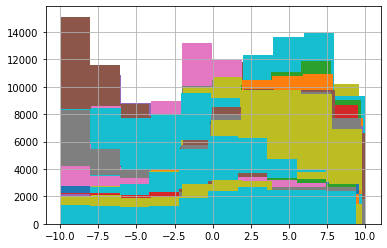

In [12]:
for text_id in jester_annotations.text_id.unique():
    
    plt.title('text_id = ' + text_id)
    jester_annotations[jester_annotations.text_id == text_id].humor.hist()
    